In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-customer-churn-dataset/online_retail_customer_churn.csv


In [ ]:
# predictive models to identify customers at risk of churn, enabling targeted customer retention strategies.

In [ ]:
# Customer_ID: A unique identifier for each customer.
# Age: The customer's age.
# Gender: The customer's gender (Male, Female, Other).
# Annual_Income: The annual income of the customer in thousands of dollars.
# Total_Spend: The total amount spent by the customer in the last year.
# Years_as_Customer: The number of years the individual has been a customer of the store.
# Num_of_Purchases: The number of purchases the customer made in the last year.
# Average_Transaction_Amount: The average amount spent per transaction.
# Num_of_Returns: The number of items the customer returned in the last year.
# Num_of_Support_Contacts: The number of times the customer contacted support in the last year.
# Satisfaction_Score: A score from 1 to 5 indicating the customer's satisfaction with the store.
# Last_Purchase_Days_Ago: The number of days since the customer's last purchase.
# Email_Opt_In: Whether the customer has opted in to receive marketing emails.
# Promotion_Response: The customer's response to the last promotional campaign (Responded, Ignored, Unsubscribed).
# Target_Churn: Indicates whether the customer churned (True or False).

In [3]:
import pandas as pd 

In [4]:
online_retail_customer_churn_data = pd.read_csv('/kaggle/input/online-retail-customer-churn-dataset/online_retail_customer_churn.csv')

In [ ]:
# Analysis Data 

In [6]:
online_retail_customer_churn_data.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [8]:
online_retail_customer_churn_data.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [7]:
online_retail_customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [11]:
# check missing value

online_retail_customer_churn_data.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [38]:
# Define the column names

columns = ['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 
           'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 
           'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago',
           'Email_Opt_In', 'Promotion_Response', 'Target_Churn']

In [37]:
# Define sample data rows. You would replace this with your actual data values

data = [
    [1, 30, 'Male', 50000, 12000, 5, 12, 1000, 1, 3, 4, 7, True, 'Responded', False],
    [2, 32, 'Female', 60000, 15000, 7, 15, 1000, 0, 2, 5, 5, False, 'Ignored', True]
]

In [39]:
online_retail_customer_churn_data = pd.DataFrame(data=data, columns=columns)
print(online_retail_customer_churn_data)

   Customer_ID  Age  Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0            1   30    Male          50000        12000                  5   
1            2   32  Female          60000        15000                  7   

   Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                12                        1000               1   
1                15                        1000               0   

   Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  \
0                        3                   4                       7   
1                        2                   5                       5   

   Email_Opt_In Promotion_Response  Target_Churn  
0          True          Responded         False  
1         False            Ignored          True  


In [ ]:
# data points into a graphical representation

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

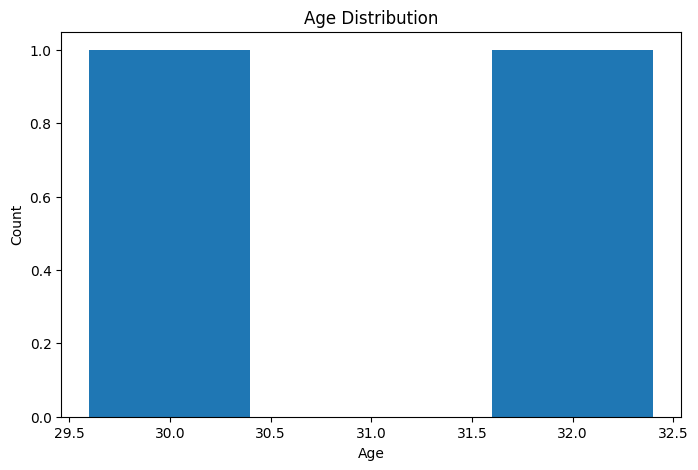

In [45]:
# Plot the age distribution (Bar Graph)

age_counts = online_retail_customer_churn_data['Age'].value_counts()
plt.figure(figsize=(8, 5)) 
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

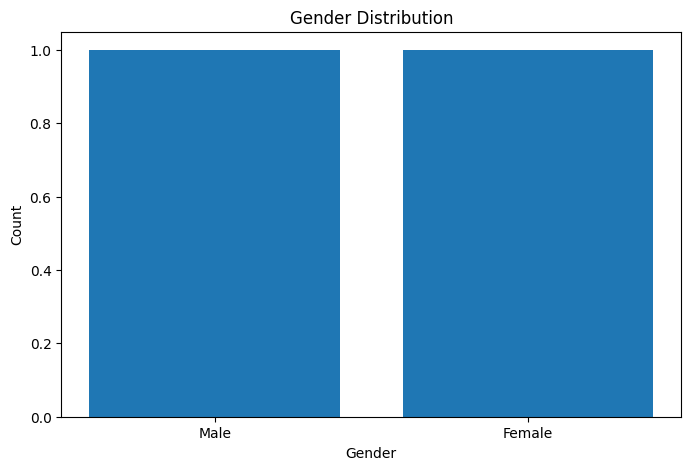

In [46]:
# Plot the gender distribution (Bar Graph)

gender_counts = online_retail_customer_churn_data['Gender'].value_counts()
plt.figure(figsize=(8, 5)) 
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


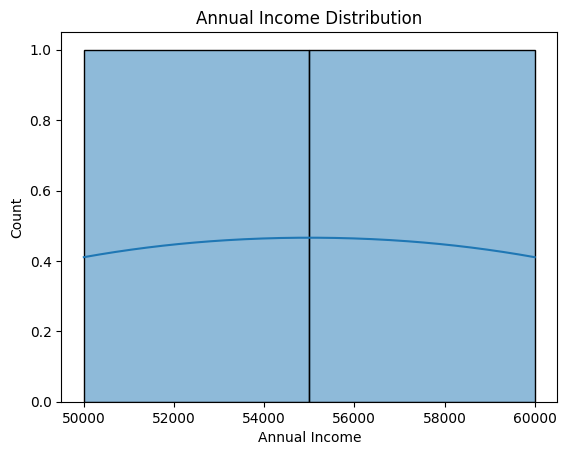

In [47]:
# Plot the annual income distribution (Choose either histplot or bar graph)

## Option 1: Histogram (If you want to see the shape)

sns.histplot(online_retail_customer_churn_data['Annual_Income'], kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income Distribution')
plt.show()

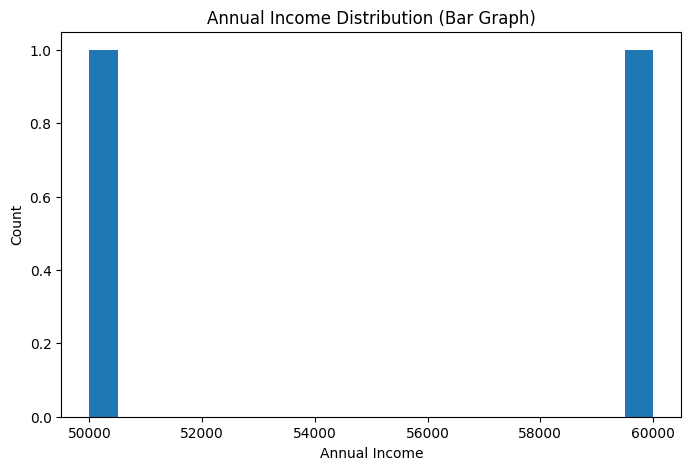

In [48]:
## Option 2: Bar Graph (If you want distinct count per income 'bin')

income_bins = 20  

# Adjust the number of bins as desired

plt.figure(figsize=(8, 5))
plt.hist(online_retail_customer_churn_data['Annual_Income'], bins=income_bins)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income Distribution (Bar Graph)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Satisfaction_Score', ylabel='Count'>

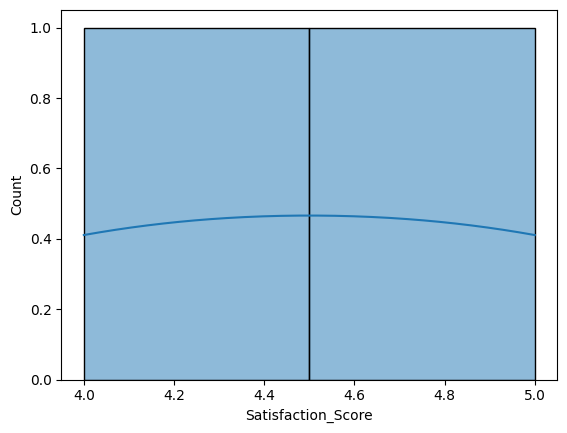

In [49]:
# Histogram - Satisfaction Score

sns.histplot(online_retail_customer_churn_data['Satisfaction_Score'], kde=True) 


<Axes: xlabel='Target_Churn', ylabel='Total_Spend'>

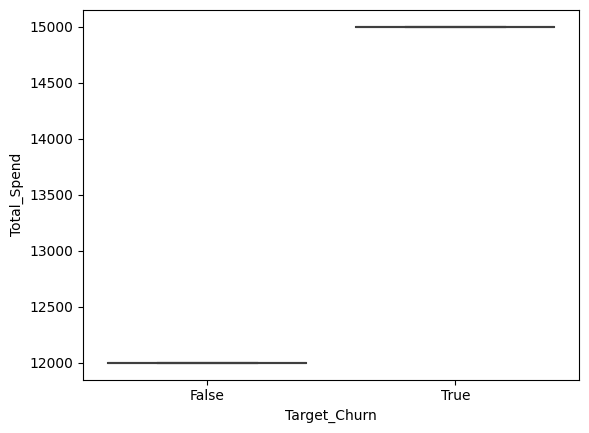

In [50]:
# Boxplot - Churned vs. Non-Churned Total Spend

sns.boxplot(x='Target_Churn', y='Total_Spend', data=online_retail_customer_churn_data)

<Axes: xlabel='Promotion_Response'>

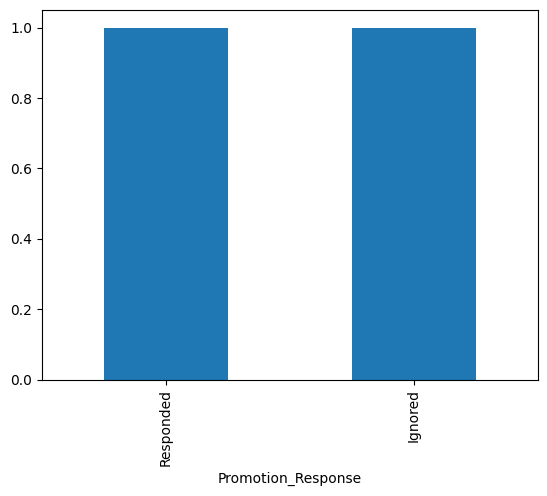

In [51]:
# Bar Chart - Promotion Responses

online_retail_customer_churn_data['Promotion_Response'].value_counts().plot(kind='bar')

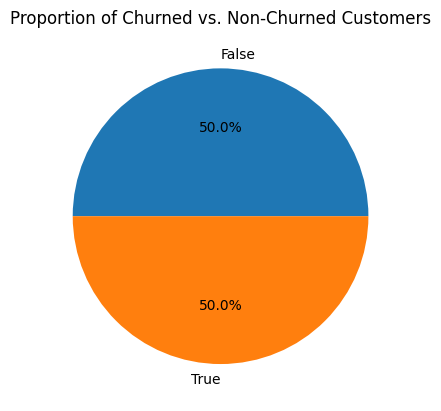

In [52]:
# Target Churn Analysis

churn_counts = online_retail_customer_churn_data['Target_Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%")
plt.title("Proportion of Churned vs. Non-Churned Customers")
plt.show()